# Three or more qubits

## Greenberger–Horne–Zeilinger states

We can entangle three qubits.

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_distribution, plot_histogram, array_to_latex
from qiskit.result import Result
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import Aer
from math import sqrt, pi

### use vector_to_latex code from qiskit 0.44
from vector_to_latex import *

In [3]:
qc = QuantumCircuit(3)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))

q_0: 
     
q_1: 
     
q_2:

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

In [4]:
qc = QuantumCircuit(3)
# qc.draw()
qc.x(0)
qc.x(1)
qc.x(2)
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

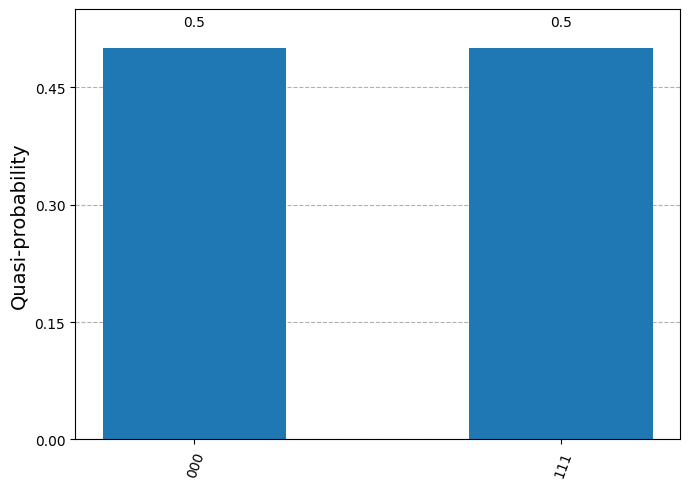

In [6]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
plot_distribution(result.get_counts())

# The Toffoli gate
The Toffoli gate is controlled $NOT$ (or $X$) which is controlled by *two qubits*, it`s named ccx. Only when two control bits equals to $|1\rangle$, the target qubit flips.

In [9]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
display(qc.draw())
qc.decompose().draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [10]:
from qiskit import transpile
new_qc = transpile(qc,basis_gates=['rz','sx','x','cx'])
new_qc.draw()

global phase: 5π/8
                                                                       »
q_0: ───────────────────────────────────────────────■──────────────────»
                                                    │                  »
q_1: ──────────────────────────────■────────────────┼───────────────■──»
     ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐»
q_2: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├»
     └─────────┘└────┘└─────────┘└───┘└──────────┘└───┘└─────────┘└───┘»
«                                  ┌─────────┐            
«q_0: ──────────────■───────■──────┤ Rz(π/4) ├──────■─────
«     ┌─────────┐   │     ┌─┴─┐    ├─────────┴┐   ┌─┴─┐   
«q_1: ┤ Rz(π/4) ├───┼─────┤ X ├────┤ Rz(-π/4) ├───┤ X ├───
«     ├─────────┴┐┌─┴─┐┌──┴───┴───┐└──┬────┬──┘┌──┴───┴──┐
«q_2: ┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├
«     └──────────┘└───┘└──────────┘   └────┘   └─────────┘

# (Fake) Real IBM qubit hardware
The available fake providers are listed at https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider#module-qiskit_ibm_runtime.fake_provider

In [2]:
from qiskit.visualization import plot_circuit_layout
from qiskit_ibm_runtime.fake_provider import FakeCairoV2,FakeGeneva,FakeVigoV2

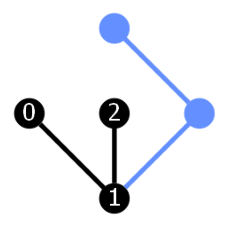

In [5]:
qc = QuantumCircuit(3)
backend = FakeVigoV2()
#backend = FakeCairoV2()
new_qc_lv0 = transpile(qc, backend=backend, optimization_level=0)
plot_circuit_layout(new_qc_lv0, backend)

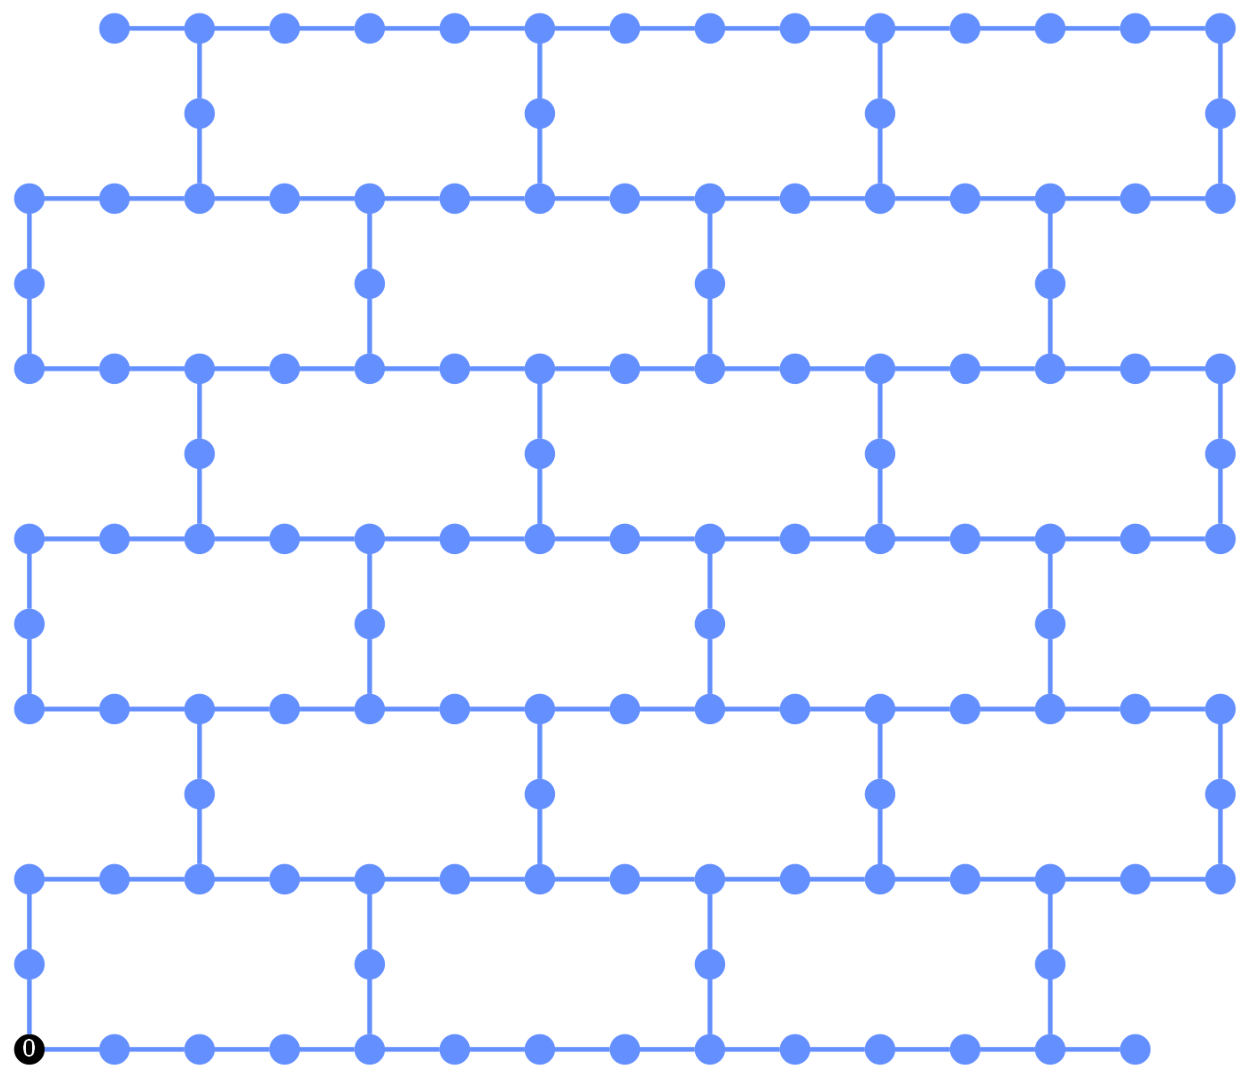

In [14]:
# the 127-qubit cores
from qiskit_ibm_runtime.fake_provider import FakeBrisbane, FakeCusco, FakeKawasaki
backend127 = FakeCusco()
new_qc_127 = transpile(qc, backend=backend127, optimization_level=0)
plot_circuit_layout(new_qc_127, backend127)

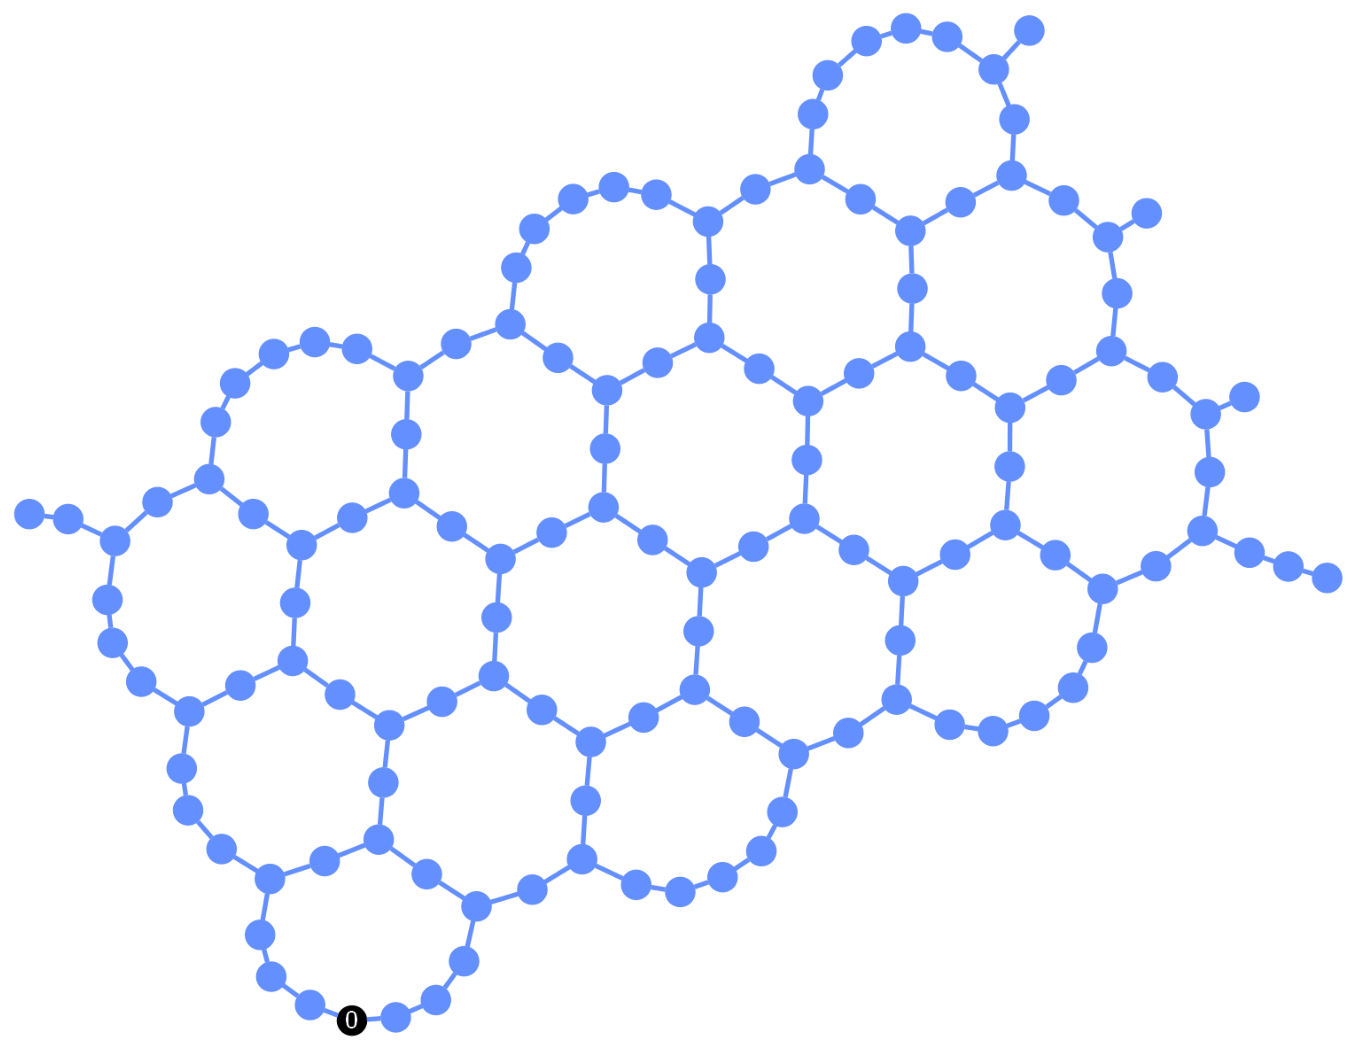

In [16]:
from qiskit_ibm_runtime.fake_provider import FakeTorino
backend133 = FakeTorino()
new_qc_133 = transpile(qc, backend=backend133, optimization_level=0)
plot_circuit_layout(new_qc_133, backend133)

let's see how the Toffoli is implemented on a (small) real IBM quantum computer:

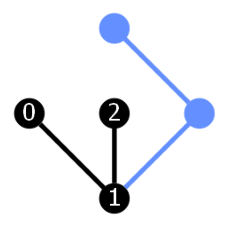

global phase: 5π/8
                                                                          »
q_0 -> 0 ──────────────────────────────────────────────────────────────■──»
                                                           ┌───┐     ┌─┴─┐»
q_1 -> 1 ──────────────────────────────■────────────────■──┤ X ├──■──┤ X ├»
         ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘»
q_2 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├──■──┤ X ├─────»
         └─────────┘└────┘└─────────┘└───┘└──────────┘└───┘     └───┘     »
«                                                                      »
«q_0 -> 0 ──────────────────────────────■──────────────────────────────»
«         ┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────┐┌─────────┐┌────┐»
«q_1 -> 1 ┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ Rz(π/2) ├┤ √X ├»
«         └─────────┘└─┬─┘├─────────┬┘└───┘└─────────┘└─────────┘└────┘»
«q_2 -> 2 ─────────────■──┤ Rz(π/4) ├──────────────────────────────────»
«                         └─────────┘                                  »
«                    ┌───┐     ┌───┐                      
«q_0 -> 0 ───────────┤ X ├──■──┤ X ├──────────────────────
«         ┌─────────┐└─┬─┘┌─┴─┐└─┬─┘     ┌─────────┐      
«q_1 -> 1 ┤ Rz(π/2) ├──■──┤ X ├──■────■──┤ Rz(π/4) ├───■──
«         └─────────┘     └───┘     ┌─┴─┐├─────────┴┐┌─┴─┐
«q_2 -> 2 ──────────────────────────┤ X ├┤ Rz(-π/4) ├┤ X ├
«                                   └───┘└──────────┘└───┘

In [21]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()
backend = FakeVigoV2()
# backend = FakeCairoV2()
new_qc_lv0 = transpile(qc, backend=backend, optimization_level=0)
display(plot_circuit_layout(new_qc_lv0, backend))
display(new_qc_lv0.draw())


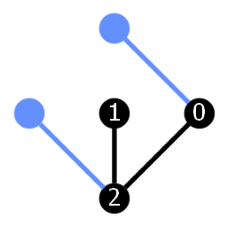

global phase: 5π/8
         ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐»
q_2 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├»
         └─────────┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘»
q_1 -> 2 ──────────────────────────────■────────────────┼───────────────■──»
                                                        │                  »
q_0 -> 3 ───────────────────────────────────────────────■──────────────────»
                                                                           »
«         ┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐     ┌───┐          »
«q_2 -> 1 ┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├──■────■──»
«         ├─────────┬┘└─┬─┘└──────────┘└────┘└─────────┘  │  └─┬─┘  │  ┌─┴─┐»
«q_1 -> 2 ┤ Rz(π/4) ├───┼─────────────────────────────────┼────┼────┼──┤ X ├»
«         └─────────┘   │                               ┌─┴─┐  │  ┌─┴─┐└───┘»
«q_0 -> 3 ──────────────■───────────────────────────────┤ X ├──■──┤ X ├─────»
«                                                       └───┘     └───┘     »
«         ┌─────────┐      
«q_2 -> 1 ┤ Rz(π/4) ├───■──
«         ├─────────┴┐┌─┴─┐
«q_1 -> 2 ┤ Rz(-π/4) ├┤ X ├
«         └──────────┘└───┘
«q_0 -> 3 ─────────────────
«

In [24]:
new_qc_lv1 = transpile(qc, backend=backend, optimization_level=1)
display(plot_circuit_layout(new_qc_lv1, backend))
display(new_qc_lv1.draw())

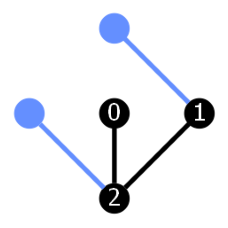

global phase: 5π/8
         ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐»
q_2 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├»
         └─────────┘└────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘»
q_0 -> 2 ──────────────────────────────┼────────────────■───────────────┼──»
                                       │                                │  »
q_1 -> 3 ──────────────────────────────■────────────────────────────────■──»
                                                                           »
«         ┌──────────┐┌───┐┌──────────┐┌────┐┌─────────┐     ┌───┐     ┌───┐»
«q_2 -> 1 ┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├──■──┤ X ├»
«         └──────────┘└─┬─┘└──────────┘└────┘└─────────┘  │  └─┬─┘  │  └─┬─┘»
«q_0 -> 2 ──────────────■─────────────────────────────────┼────┼────┼────■──»
«         ┌─────────┐                                   ┌─┴─┐  │  ┌─┴─┐     »
«q_1 -> 3 ┤ Rz(π/4) ├───────────────────────────────────┤ X ├──■──┤ X ├─────»
«         └─────────┘                                   └───┘     └───┘     »
«         ┌──────────┐┌───┐
«q_2 -> 1 ┤ Rz(-π/4) ├┤ X ├
«         ├─────────┬┘└─┬─┘
«q_0 -> 2 ┤ Rz(π/4) ├───■──
«         └─────────┘      
«q_1 -> 3 ─────────────────
«

In [25]:
new_qc_lv2 = transpile(qc, backend=backend, optimization_level=2)
display(plot_circuit_layout(new_qc_lv2, backend))
display(new_qc_lv2.draw())

In general, the optimal optimization is not a solved problem so it becomes a somewhat subjective tradeoff between classical computation time and quantum computation or accuracy.

The Toffoli gate with two inputs and one output is closer to a classical digital logic gate than anything else we have seen so far. On its own it is already similar to an AND operation, assuming the output qubit is initialized in $|0\rangle$.


# Other logical operations

In [6]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
display(qc.draw())

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [7]:
qc = QuantumCircuit(3)
qc.cx(0,2)
qc.cx(1,2)
qc.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘

In [8]:
qc = QuantumCircuit(3)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,2)
qc.draw()

q_0: ──■─────────■──
       │         │  
q_1: ──┼────■────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

We note that for the sake of reversibility, the "input" qubits are available at the end of the circuit (whereas classical digital logic destroys this information) and in fact for the OR circuit it does not matter in what order we apply the three gates.

The Toffoli can be generalized to many inputs, applying $X$ to the target if all the inputs are $|1\rangle$. Older versions of ```qiskit```directly featured the $MCT$ (multi-controlled Toffoli) gate (e.g. https://docs.quantum.ibm.com/api/qiskit/0.46/qiskit.circuit.QuantumCircuit#mct ) but now we use the multi-controlled $X$, $MCX$ ( https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#mcx ).

In [9]:
qc = QuantumCircuit(5)
qc.mcx([0,1,2,3],4)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
       │  
q_3: ──■──
     ┌─┴─┐
q_4: ┤ X ├
     └───┘

In [22]:
for num in range(0,2**4):
    qc = QuantumCircuit(5)
    q0=num % 2
    q1=int((num % 4 - q0)/2)
    q2=int((num % 8 - 2*q1 - q0)/4)
    q3=int((num % 16 - 4*q2 - 2*q1 - q0)/8)
    if q0==1: qc.x(0)
    if q1==1: qc.x(1)
    if q2==1: qc.x(2)
    if q3==1: qc.x(3)
    qc.mcx([0,1,2,3],4)
    display(qc.draw())
    svsim = Aer.get_backend('statevector_simulator')
    result = svsim.run(qc).result()
    print(result.get_counts())


q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
       │  
q_3: ──■──
     ┌─┴─┐
q_4: ┤ X ├
     └───┘

{np.str_('00000'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     └───┘  │  
q_1: ───────■──
            │  
q_2: ───────■──
            │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00001'): np.float64(1.0)}


q_0: ───────■──
     ┌───┐  │  
q_1: ┤ X ├──■──
     └───┘  │  
q_2: ───────■──
            │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00010'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     ├───┤  │  
q_1: ┤ X ├──■──
     └───┘  │  
q_2: ───────■──
            │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00011'): np.float64(1.0)}


q_0: ───────■──
            │  
q_1: ───────■──
     ┌───┐  │  
q_2: ┤ X ├──■──
     └───┘  │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00100'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     └───┘  │  
q_1: ───────■──
     ┌───┐  │  
q_2: ┤ X ├──■──
     └───┘  │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00101'): np.float64(1.0)}


q_0: ───────■──
     ┌───┐  │  
q_1: ┤ X ├──■──
     ├───┤  │  
q_2: ┤ X ├──■──
     └───┘  │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00110'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     ├───┤  │  
q_1: ┤ X ├──■──
     ├───┤  │  
q_2: ┤ X ├──■──
     └───┘  │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00111'): np.float64(1.0)}


q_0: ───────■──
            │  
q_1: ───────■──
            │  
q_2: ───────■──
     ┌───┐  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01000'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     └───┘  │  
q_1: ───────■──
            │  
q_2: ───────■──
     ┌───┐  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01001'): np.float64(1.0)}


q_0: ───────■──
     ┌───┐  │  
q_1: ┤ X ├──■──
     └───┘  │  
q_2: ───────■──
     ┌───┐  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01010'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     ├───┤  │  
q_1: ┤ X ├──■──
     └───┘  │  
q_2: ───────■──
     ┌───┐  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01011'): np.float64(1.0)}


q_0: ───────■──
            │  
q_1: ───────■──
     ┌───┐  │  
q_2: ┤ X ├──■──
     ├───┤  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01100'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     └───┘  │  
q_1: ───────■──
     ┌───┐  │  
q_2: ┤ X ├──■──
     ├───┤  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01101'): np.float64(1.0)}


q_0: ───────■──
     ┌───┐  │  
q_1: ┤ X ├──■──
     ├───┤  │  
q_2: ┤ X ├──■──
     ├───┤  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('01110'): np.float64(1.0)}


┌───┐     
q_0: ┤ X ├──■──
     ├───┤  │  
q_1: ┤ X ├──■──
     ├───┤  │  
q_2: ┤ X ├──■──
     ├───┤  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('11111'): np.float64(1.0)}


This requires that all the control qubits be $|1\rangle$ in order to flip the target qubit. It is a logical AND.  https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.AND
We can implement a logical OR https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.OR using a multi-controlled $X$ in which we specify that each $X$ operation is controlled by $|0\rangle$ rather than $|1\rangle$ on the control, and $X$ on the target:

In [11]:
qc = QuantumCircuit(5)
qc.x(4)
qc.mcx([0,1,2,3],4,ctrl_state=0)
qc.draw()

q_0: ───────o──
            │  
q_1: ───────o──
            │  
q_2: ───────o──
            │  
q_3: ───────o──
     ┌───┐┌─┴─┐
q_4: ┤ X ├┤ X ├
     └───┘└───┘

In [14]:
qc = QuantumCircuit(5)
qc.mcx([0,1,2,3],4,ctrl_state=5)
qc.mcx([0,1,2,3],4,ctrl_state='0101')
qc.draw()

q_0: ──■────■──
       │    │  
q_1: ──o────o──
       │    │  
q_2: ──■────■──
       │    │  
q_3: ──o────o──
     ┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├
     └───┘└───┘

In [32]:
qc = QuantumCircuit(5)
#qc.x(0)
qc.x(1)
qc.x(2)
#qc.x(3)
qc.mcx([0,1,2,3],4,ctrl_state=13)
display(qc.draw())
#display(qc.decompose().draw())
#display(qc.decompose().decompose().draw())

svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
print(result.get_counts())

q_0: ───────■──
     ┌───┐  │  
q_1: ┤ X ├──o──
     ├───┤  │  
q_2: ┤ X ├──■──
     └───┘  │  
q_3: ───────■──
          ┌─┴─┐
q_4: ─────┤ X ├
          └───┘

{np.str_('00110'): np.float64(1.0)}


In [20]:
control=13

for num in range(0,2**4):
    qc = QuantumCircuit(5)
    q0=num % 2
    q1=int((num % 4 - q0)/2)
    q2=int((num % 8 - 2*q1 - q0)/4)
    q3=int((num % 16 - 4*q2 - 2*q1 - q0)/8)
    # print(num, q3, q2, q1, q0)
    if q0==1: qc.x(0)
    if q1==1: qc.x(1)
    if q2==1: qc.x(2)
    if q3==1: qc.x(3)
    qc.x(4)
    qc.mcx([0,1,2,3],4,ctrl_state=control)
    #display(qc.draw())
        
    svsim = Aer.get_backend('statevector_simulator')
    result = svsim.run(qc).result()
    print(num, result.get_counts())

0 {np.str_('10000'): np.float64(1.0)}
1 {np.str_('10001'): np.float64(1.0)}
2 {np.str_('10010'): np.float64(1.0)}
3 {np.str_('10011'): np.float64(1.0)}
4 {np.str_('10100'): np.float64(1.0)}
5 {np.str_('10101'): np.float64(1.0)}
6 {np.str_('10110'): np.float64(1.0)}
7 {np.str_('10111'): np.float64(1.0)}
8 {np.str_('11000'): np.float64(1.0)}
9 {np.str_('11001'): np.float64(1.0)}
10 {np.str_('11010'): np.float64(1.0)}
11 {np.str_('11011'): np.float64(1.0)}
12 {np.str_('11100'): np.float64(1.0)}
13 {np.str_('01101'): np.float64(1.0)}
14 {np.str_('11110'): np.float64(1.0)}
15 {np.str_('11111'): np.float64(1.0)}


The $MCX$ gate can be implemented using different techniques, which use different numbers of ancilla qubits and have varying circuit depth. See https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#mcx

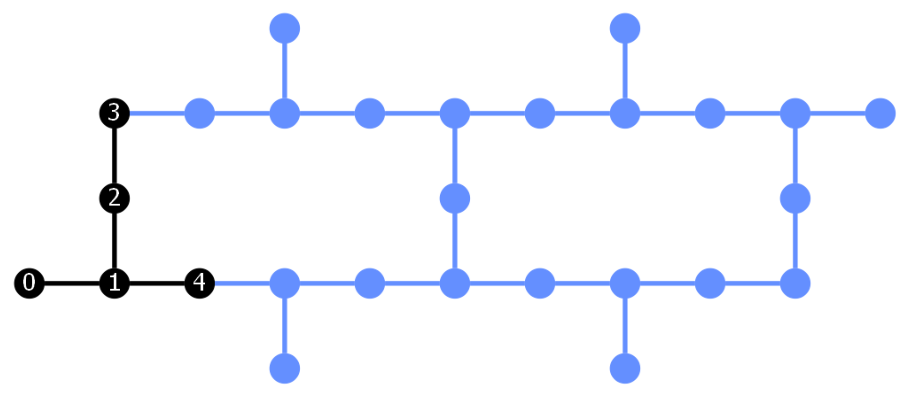

In [25]:
qc = QuantumCircuit(5)
qc.mcx([0,1,2,3],4,ctrl_state=5)
backend = FakeGeneva()
new_qc_lv0 = transpile(qc, backend=backend, optimization_level=0)
#display(new_qc_lv0.draw())
plot_circuit_layout(new_qc_lv0, backend)

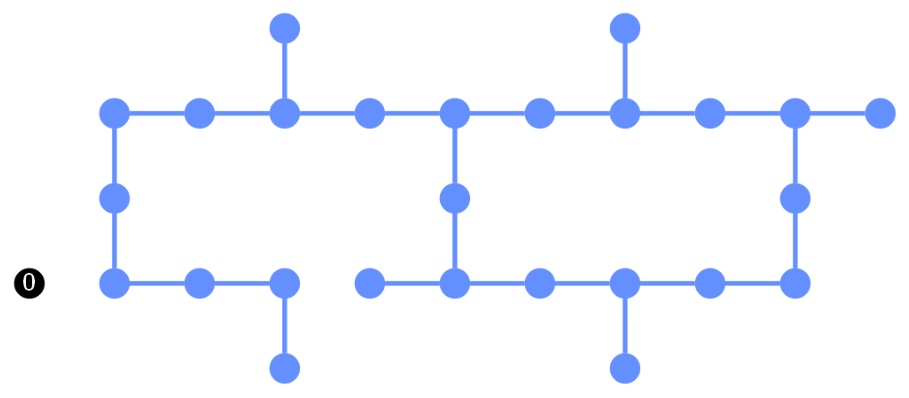

In [28]:
#the same circuit won't work on FakeCairoV2 because despite 
#having the same number of qubits, it lacks some connectivity:

new_qc_lv1 = transpile(qc, backend=backend, optimization_level=1)
#display(new_qc_lv1.draw())
plot_circuit_layout(new_qc_lv1, backend)

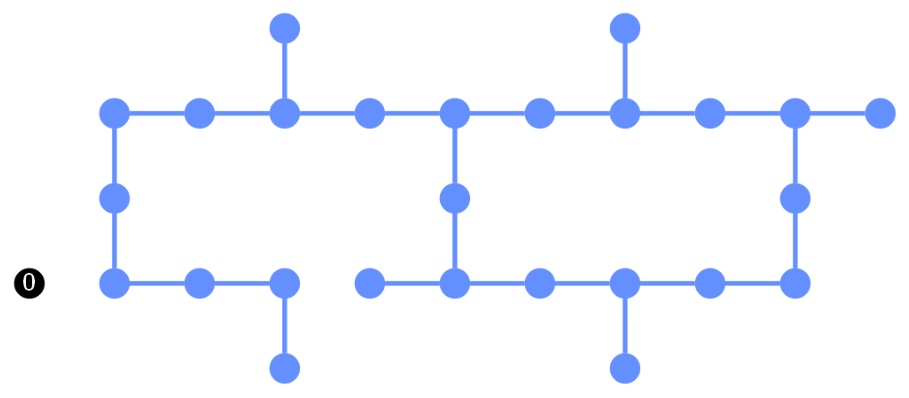

In [26]:
qc = QuantumCircuit(1)
backend = FakeCairoV2()
new_qc_lv0 = transpile(qc, backend=backend, optimization_level=0)
plot_circuit_layout(new_qc_lv0, backend)

## Quantum Volume

This leads to the metric of [Quantum Volume](https://qiskit.org/textbook/ch-quantum-hardware/measuring-quantum-volume.html) (QV). It quantifies the largest random circuit of equal width $m$ and depth $d$ that the computer successfully implements. It's not $m \times d$ which would anyway be an area rather than a volume, but it's whichever is smaller between $m$ and $d$.